In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [3]:
df.shape

(395547, 8)

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

In [9]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [10]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [11]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


In [12]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

In [13]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
교통/건축/국토        3
육아/교육           3
보건복지            3
성장동력            2
경제민주화           2
행정              1
미래              1
Name: category, dtype: int64

In [17]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


In [18]:
df_20_loc = df_20
df_20_loc.sort_values(by='votes', ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


In [19]:
df['answer'] = (df['votes'] > 200000) == 1

In [20]:
df.shape

(395547, 9)

In [21]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

In [22]:
df['answer'] = df['answer'].astype('int')

In [23]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

In [24]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0


In [25]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [26]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 535일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [27]:
petitions_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
petitions_best

,category,answer,answer_diff,answered,article_id,votes
0,인권/성평등,24,15,9,7963154504,12559348
1,안전/환경,10,8,2,7529327085,6605175
2,정치개혁,8,6,2,14675522264,6205013
3,기타,8,7,1,12225143856,5190468
4,육아/교육,3,2,1,5822857976,4475297
5,보건복지,3,1,2,6589637853,4341211
6,문화/예술/체육/언론,7,3,4,4427495546,4149796
7,외교/통일/국방,4,3,1,6869752323,3696112
8,교통/건축/국토,3,1,2,8551310963,2902330
9,반려동물,4,4,0,1033826398,2066624


In [28]:
petitions_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]


,answer,answer_diff,answered,article_id,votes
start,,,,,
2018-10-17,1,1,0,378900198,1300523
2018-10-31,2,2,0,430964099,827096
2018-06-13,1,1,0,146187973,786157
2018-10-18,2,2,0,423557789,721524
2018-02-19,1,0,1,99332898,701520
2018-11-09,2,2,0,349439392,672819
2018-07-22,1,1,0,282639463,672491
2017-09-06,1,0,1,22268570,648209
2018-06-24,2,2,0,359345089,628925


In [29]:
votes_df = votes_df.reset_index()
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
0,2017-11-11,9623,0,0,0,348559310,85074
1,2017-09-05,5952,0,0,0,38414241,48808
2,2018-01-11,3368,0,0,0,291069195,44570
3,2018-02-06,2631,0,0,0,342371897,83038
4,2017-11-09,2487,0,0,0,73459579,34774


In [30]:
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
116,2018-10-17,926,1,1,0,378900198,1300523
81,2018-10-31,1010,2,2,0,430964099,827096
384,2018-06-13,542,1,1,0,146187973,786157
72,2018-10-18,1032,2,2,0,423557789,721524
270,2018-02-19,698,1,0,1,99332898,701520


In [31]:
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek
df.shape

(395547, 14)

In [32]:
crypto = df[( df.title.str.find('가상화폐') != -1 ) | ( df.content.str.find('가상화폐') != -1  )]
crypto.shape

(7921, 14)

In [33]:
crypto.head()

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
12781,12841,2017-09-08,2017-12-07,0,3,성장동력,가상전자화폐를 인정하고 규제해야합니다,가상전자화폐\n흔히 코인이라 불리는 비생산적이고 소모적이며\n시장을 혼란케 하고 산...,0,0,9,8,0,4
19325,19575,2017-10-06,2017-11-05,0,5,성장동력,ICO 전면금지에 대한 입장,정부는 9월 29일 김용범 금융위원회 부위원장 주재로 <가상통화 관계기관 합동TF>...,0,0,10,6,0,4
20874,21277,2017-10-15,2017-11-14,0,3906,미래,대통령님에게 전하는 지부상소(持斧上疏)입니다. -블록체인 기술에 대한 이야기-,지부상소(持斧上疏)를 이야기할 만큼 간절하게 원합니다.\n이 글이 문재인 대통령님께...,0,0,10,15,0,6
20911,21327,2017-10-15,2017-11-14,0,3,경제민주화,가상화폐 투기 광풍을 막아주세요,가상화폐 규제 어떻게 해야 하나 ?\n이제 우리 앞에 놓여진 사회적 이슈가 되어\n...,0,0,10,15,0,6
26541,27765,2017-11-08,2017-12-08,0,1,경제민주화,가상화폐 투자대행회사의 무분별한 수수료 바로잡아주세요,가상화폐 ico로 대리업무를 대행해주고 5-30% 수수료를 책정하고 계약서나 기타 ...,0,0,11,8,0,2


In [34]:
crypto['category'].value_counts()

경제민주화          1970
미래             1900
성장동력           1409
기타             1024
정치개혁            882
행정              350
일자리             113
인권/성평등           65
안전/환경            56
외교/통일/국방         44
교통/건축/국토         40
문화/예술/체육/언론      29
보건복지             16
육아/교육             8
저출산/고령화대책         8
반려동물              5
농산어촌              2
Name: category, dtype: int64

In [52]:
import re
p = r'.*(돌봄|아이|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(47490, 14)

In [44]:
#1.답변받은 청원 중 투표 가장 많이 받은것(투표순으로 정렬)
df_answered=df.loc[df['answered']==1,:]
df_answered

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1,0,9,3,0,6
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,9,6,0,2
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,1,0,9,30,0,5
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",1,0,11,4,0,5
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1,0,11,17,0,4
47285,49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",1,0,11,24,0,4
54896,57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,1,0,12,3,0,6
70744,76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,1,0,12,28,0,3
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,1,0,1,3,0,2
74640,81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,1,0,1,6,0,5


In [45]:
df_answered.sort_values('votes', ascending=False)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,9,6,0,2
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0,2,19,0,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0,5,11,0,4
303793,395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",1,0,10,2,0,1
91882,105105,2018-01-20,2018-02-19,1,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,1,0,1,20,0,5
164274,203181,2018-04-17,2018-05-17,1,302082,행정,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,1,0,4,17,0,1
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1,0,9,3,0,6
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1,0,11,17,0,4
85497,96427,2018-01-15,2018-02-14,1,277674,정치개혁,국회의원 급여를 최저시급으로 책정해 주세요,최저시급 인상 반대하던 의원들부터 최저시급으로 책정해주시고 최저시급으로 일하는 노동...,1,0,1,15,0,0
305013,397558,2018-10-04,2018-11-03,1,275806,정치개혁,최**과 이하 비슷한 리벤지포르노 범들 강력징역해주세요.,리벤지포르노 징역이라고 네이버에 치면\n제일 먼저 뜨는 기사가 뭔줄 아십니까?\n“...,1,0,10,4,0,3


In [48]:
#2. 답변대상 청원 중 답변받지 못한 것 투표순으로 정렬
df_not_answered=df.loc[df['answer_diff']==1,:]
df_not_answered

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
137035,164255,2018-03-12,2018-04-11,0,216886,기타,GMO완전표시제 시행을 촉구합니다!,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,1,1,3,12,0,0
138242,165796,2018-03-13,2018-04-12,0,304320,정치개혁,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,1,1,3,13,0,1
144223,173355,2018-03-23,2018-04-22,0,209494,안전/환경,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,1,1,3,23,0,4
144874,174292,2018-03-24,2018-04-23,0,278128,안전/환경,미세먼지의 위험 그리고 오염 및 중국에대한 항의,미세먼지가 10년전에 비해 상당히 자주 몰려오고있습니다.\n언론에서도 중국발이라고 ...,1,1,3,24,0,5
148359,178781,2018-03-28,2018-04-27,0,215036,안전/환경,세월호 관련 청문회 위증한 조여옥대위 징계바랍니다.,세월호 관련해서 그 동안 거짓으로 감추고 숨겨왔던 사실들이 조금씩 드러나고 있습니다...,1,1,3,28,0,2
154986,187633,2018-04-06,2018-05-06,0,242286,경제민주화,삼성증권 시스템 규제와 공매도 금지,우리사주 280만주에 배당 주당 1000원 하기로 하고 현금배당 28억원이 나가야될...,1,1,4,6,0,4
161851,199622,2018-04-14,2018-05-14,0,236714,문화/예술/체육/언론,티비 조선의 종편 허가 취소 청원,"과거부터 현재진행형으로 허위, 과장, 날조 보도를 일삼고\n국민의 알권리를 호도하는...",1,1,4,14,0,5
161950,199778,2018-04-15,2018-05-15,0,216163,기타,어른들에게 성적 학대와 조롱을 당하고 있는 아이들을 구해주세요.,"4월 1일 새벽 2시 경, 구글 서칭 중 불법 야동 사이트(https://y****...",1,1,4,15,0,6
163363,201953,2018-04-16,2018-05-16,0,260624,정치개혁,선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.,이미 청와대가 선관위에 질의사항으로 접수한\n김기식 금융감독원장의 정치자금법 위반 ...,1,1,4,16,0,0
175768,219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생...",1,1,5,2,0,2


In [53]:
df_not_answered.sort_values('votes', ascending=False)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1,10,17,0,2
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1,6,13,0,2
327873,426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,1,1,10,31,0,2
242969,314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,1,1,7,22,0,6
336559,437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,1,1,11,9,0,4
340046,442093,2018-11-14,2018-12-14,0,365418,인권/성평등,이수역 폭행사건,11월 13일 새벽4시 경 이수역의 한 맥주집에서 남자 다섯명이 여성 두 명을 폭행...,1,1,11,14,0,2
218365,282903,2018-06-24,2018-07-24,0,354935,기타,"가해자들은 떳떳이 생활하고, 집단 성폭행 당한 피해자인 저희아이는 오히려 더 죄인같...",저는 15살 여중생을 둔 엄마입니다.\n2018년 3월 저희 아이는 2000년생 남...,1,1,6,24,0,6
175768,219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생...",1,1,5,2,0,2
284574,369690,2018-09-06,2018-10-06,0,330587,인권/성평등,제 남편의 억울함을 풀어주세요!,제 남편이 어제 재판에서 징역6개월을 받고 그 자리에서 법정구속 되었습니다\n어제 ...,1,1,9,6,0,3
390787,510422,2019-01-29,2019-02-28,0,312197,기타,"경사 ***, 경장 *** 외 ***에서 뇌물받는지 조사부탁드립니다.","경사 ***, 경장 *** 등등 ***에서 뇌물받는지 조사부탁드립니다.\nㅡㅡㅡㅡㅡ...",1,1,1,29,0,1


In [55]:
t=['월', '화', '수', '목', '금', '토', '일']
df_d=pd.DataFrame(df)
df_d['start']=pd.to_datetime(df_d['start'], format='%Y-%m-%d')
df_d['weekday']=df_d['start'].dt.dayofweek
df_d['month']=df_d['start'].dt.month
df_d['year']=df_d['start'].dt.year
df_d['yearmonth']=df_d['start'].dt.to_period(freq='M')

In [56]:
category1=pd.DataFrame(df_d['weekday'].value_counts()).reset_index()
category1.columns=['weekday','counts']
category1=category1.sort_values('weekday',ascending=True)

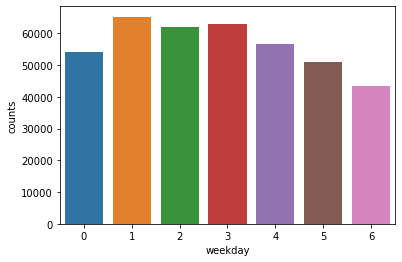

In [57]:
#3. 요일별 청원 수
plt.subplots()
sns.barplot(x='weekday', y='counts', data=category1)
plt.show()

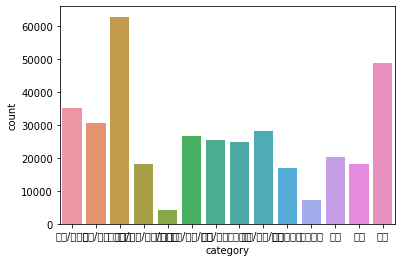

In [69]:
#4. 카테고리별 청원 수
ax=plt.subplots()
ax=sns.countplot('category',data=df, order=['인권/성평등', '안전/환경', '정치개혁', '문화/예술/체육/언론', '반려동물', '외교/통일/국방', '육아/교육', '보건복지', '교통/건축/국토', '경제민주화', '성장동력', '행정', '미래', '기타'])

In [59]:
#월별로 데이터를 정확히 분석하기 위해 연도별로 데이터 분류(이 데이터는 2017년 8월~2019년 2월 데이터이므로 2018년만 추출)
df.index=df['start']
df18=df['2018']
df18

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow,weekday,month,year,yearmonth
start,,,,,,,,,,,,,,,,,,
2018-01-01,77785,2018-01-01,2018-01-31,0,6,행정,아...이런데서 이상한 글이 올라오네요...,"이런 국민청원하는 게시판에서 뭐 섹스,희주야'''''이런 이상한 글 올라오는데 여기...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77786,2018-01-01,2018-01-31,0,1,기타,"현재 사람들 사이에서 유행하는 게임 ""배틀 그라운드"" 에 대한 제재를 가하려 합니다.","""배틀 그라운드""는 현재 세계적으로나 우리나라 에서나 매우 흥행 하는 게임입니다. ...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77787,2018-01-01,2018-01-31,0,0,정치개혁,양심수 석방 국가보안법 철폐,적폐청산의 시금석\n양심수들의 특별사면 배제\n문재인 정부를 규탄한다.\n지난 12...,0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77788,2018-01-01,2018-01-31,0,3,인권/성평등,민주화유공자들에 대한 국가유공자 인정 요청,"안녕하세요.\n살벌한 독재시대를 떠나, 대한민국 민주화를 이룩하신 수많은 열사들이,...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77789,2018-01-01,2018-01-31,0,0,외교/통일/국방,UAE 관련,Uae 괸련한 야당 질의와 관련하여 기본적으로 유시민 작가의 말씀에 동의하여 국익에...,0,0,1,1,0,0,0,1,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,483900,2018-12-31,2019-01-30,0,6,정치개혁,김정은 친서 의역 금지 및 공개 청원...,공개할거면 내용 그대로 공개 하고 '의역 = 허위 과장' 하지 마세요...\n지난 ...,0,0,12,31,0,0,0,12,2018,2018-12
2018-12-31,483902,2018-12-31,2019-01-30,0,21,문화/예술/체육/언론,엑소 해체,엑소 해체해주세요 빨리요,0,0,12,31,0,0,0,12,2018,2018-12
2018-12-31,483903,2018-12-31,2019-01-30,0,5,정치개혁,박근혜를 사면하라,박근혜를 사면하라,0,0,12,31,0,0,0,12,2018,2018-12


In [60]:
#2018년에 답변받은 청원 중 투표 가장 많이 받은것(투표순으로 정렬)
df_answered2=df18.loc[df18['answered']==1,:]
df_answered2.sort_values('votes', ascending=False)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow,weekday,month,year,yearmonth
start,,,,,,,,,,,,,,,,,,
2018-02-19,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0,2,19,0,0,0,2,2018,2018-02
2018-05-11,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0,5,11,0,4,4,5,2018,2018-05
2018-10-02,395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",1,0,10,2,0,1,1,10,2018,2018-10
2018-01-20,105105,2018-01-20,2018-02-19,1,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,1,0,1,20,0,5,5,1,2018,2018-01
2018-04-17,203181,2018-04-17,2018-05-17,1,302082,행정,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,1,0,4,17,0,1,1,4,2018,2018-04
2018-01-15,96427,2018-01-15,2018-02-14,1,277674,정치개혁,국회의원 급여를 최저시급으로 책정해 주세요,최저시급 인상 반대하던 의원들부터 최저시급으로 책정해주시고 최저시급으로 일하는 노동...,1,0,1,15,0,0,0,1,2018,2018-01
2018-10-04,397558,2018-10-04,2018-11-03,1,275806,정치개혁,최**과 이하 비슷한 리벤지포르노 범들 강력징역해주세요.,리벤지포르노 징역이라고 네이버에 치면\n제일 먼저 뜨는 기사가 뭔줄 아십니까?\n“...,1,0,10,4,0,3,3,10,2018,2018-10
2018-02-05,127921,2018-02-05,2018-03-07,1,252969,보건복지,정형식 판사에 대해서 이 판결과 그 동안 판결에 대한 특별 감사를 청원합니다!!!,국민의 돈인 국민 연금에 손실을 입힌 범죄자의 구속을 임의로 풀어준\n정형식 판사에...,1,0,2,5,0,0,0,2,2018,2018-02
2018-02-23,148806,2018-02-23,2018-03-25,1,242687,인권/성평등,조두순 사건의 피해자 가족을 우롱하는 윤서인을 처벌해주십시오,'윤서인'이라는 만화가가 조두순 사건을 인용하여 정치상황을 풍자하는 만화를 그렸는데...,1,0,2,23,0,4,4,2,2018,2018-02


In [61]:
t=['월', '화', '수', '목', '금', '토', '일']
df_d_18=pd.DataFrame(df18)
df_d_18['start']=pd.to_datetime(df_d_18['start'], format='%Y-%m-%d')
df_d_18['weekday']=df_d_18['start'].dt.dayofweek
df_d_18['month']=df_d_18['start'].dt.month
df_d_18['year']=df_d_18['start'].dt.year
df_d_18['yearmonth']=df_d_18['start'].dt.to_period(freq='M')

In [62]:
category1_18=pd.DataFrame(df_d_18['weekday'].value_counts()).reset_index()
category1_18.columns=['weekday','counts']
category1_18=category1_18.sort_values('weekday',ascending=True)

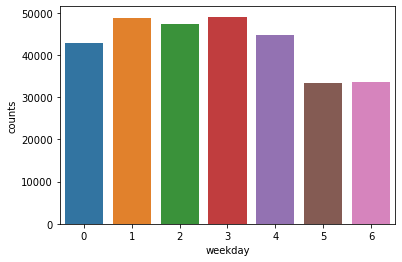

In [63]:

#2018년 요일별 청원 수
plt.subplots()
sns.barplot(x='weekday', y='counts', data=category1_18)
plt.show()

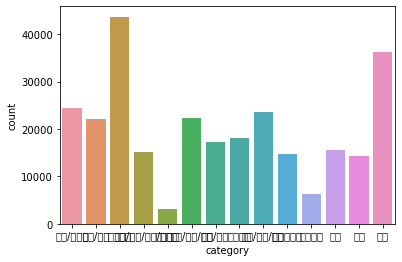

In [70]:
#2018년 카테고리별 청원 수
ax=plt.subplots()
ax=sns.countplot('category',data=df18, order=['인권/성평등', '안전/환경', '정치개혁', '문화/예술/체육/언론', '반려동물', '외교/통일/국방', '육아/교육', '보건복지', '교통/건축/국토', '경제민주화', '성장동력', '행정', '미래', '기타'])

In [71]:
df18_month=pd.DataFrame(df18)
df18_month['month']=df18_month['start'].dt.month
df18_month

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow,weekday,month,year,yearmonth
start,,,,,,,,,,,,,,,,,,
2018-01-01,77785,2018-01-01,2018-01-31,0,6,행정,아...이런데서 이상한 글이 올라오네요...,"이런 국민청원하는 게시판에서 뭐 섹스,희주야'''''이런 이상한 글 올라오는데 여기...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77786,2018-01-01,2018-01-31,0,1,기타,"현재 사람들 사이에서 유행하는 게임 ""배틀 그라운드"" 에 대한 제재를 가하려 합니다.","""배틀 그라운드""는 현재 세계적으로나 우리나라 에서나 매우 흥행 하는 게임입니다. ...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77787,2018-01-01,2018-01-31,0,0,정치개혁,양심수 석방 국가보안법 철폐,적폐청산의 시금석\n양심수들의 특별사면 배제\n문재인 정부를 규탄한다.\n지난 12...,0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77788,2018-01-01,2018-01-31,0,3,인권/성평등,민주화유공자들에 대한 국가유공자 인정 요청,"안녕하세요.\n살벌한 독재시대를 떠나, 대한민국 민주화를 이룩하신 수많은 열사들이,...",0,0,1,1,0,0,0,1,2018,2018-01
2018-01-01,77789,2018-01-01,2018-01-31,0,0,외교/통일/국방,UAE 관련,Uae 괸련한 야당 질의와 관련하여 기본적으로 유시민 작가의 말씀에 동의하여 국익에...,0,0,1,1,0,0,0,1,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,483900,2018-12-31,2019-01-30,0,6,정치개혁,김정은 친서 의역 금지 및 공개 청원...,공개할거면 내용 그대로 공개 하고 '의역 = 허위 과장' 하지 마세요...\n지난 ...,0,0,12,31,0,0,0,12,2018,2018-12
2018-12-31,483902,2018-12-31,2019-01-30,0,21,문화/예술/체육/언론,엑소 해체,엑소 해체해주세요 빨리요,0,0,12,31,0,0,0,12,2018,2018-12
2018-12-31,483903,2018-12-31,2019-01-30,0,5,정치개혁,박근혜를 사면하라,박근혜를 사면하라,0,0,12,31,0,0,0,12,2018,2018-12


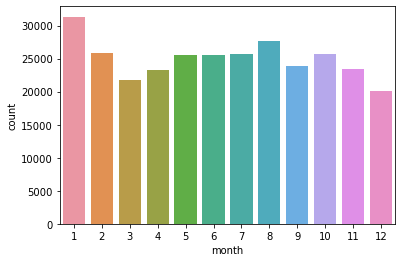

In [72]:
#2018년 월별 청원 수 비교
ax=plt.subplots()
ax=sns.countplot('month', data=df18_month)

In [ ]:
#1월에 가장 많은 청원이, 12월에 가장 적은 청원이 올라왔음을 알 수 있다.